In [1085]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [1086]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Set the theme for seaborn
sns.set_theme()

# Suppress warnings
warnings.filterwarnings('ignore')

# Read Data

In [1087]:
sales = pd.read_csv("Walmart.csv")
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Info

In [1088]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [1089]:
sales.describe().round(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [1090]:
sales.describe(include="O")

,Date
count,6435
unique,143
top,05-02-2010
freq,45


* we need to make Date column Datetime

# Data Cleaning

1. Rename Columns

In [1091]:
#Rename the Holiday_Flag column to make it easier to understand
sales.rename({"Holiday_Flag" : "Holidays"} ,axis=1 ,inplace=True)
sales.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holidays', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

2. Missing Values

In [1092]:
sales.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holidays        0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

* The dataset doesn't have any missing values

3. Dublicate Rows

In [1093]:
sales.duplicated().sum()

np.int64(0)

* The dataset doesn't have any Duplicate values

* ***The Dataset Already Cleaned***

# Feature Engineering

In [1094]:
#change Datatype of Date column
sales["Date"] = pd.to_datetime(sales["Date"], format = "%d-%m-%Y")

* We need to extract Some columns from Date Column

In [1095]:
#Extract week column
sales['Week'] = sales['Date'].dt.isocalendar().week
sales['Week'] = sales['Week'].astype('int32')

#Extract Month Column
sales["Month"] = sales["Date"].dt.month

#Extract Month Name Column
sales["Month_Name"] = sales["Date"].dt.month_name()

#Extract Quarter column
sales["Quarter"] = sales["Date"].dt.quarter

#Extract Year Column
sales["Year"] = sales["Date"].dt.year


* We need Also To extract Season column

In [1096]:
#Create function to extract seasons from month column
def get_season(month):
    if month in [1, 2, 3]:
        season = "Winter"
    elif month in [4, 5, 6]:
        season = "Spring"
    elif month in [7, 8, 9]:
        season = "Summer"
    else:
        season = "Fall"
    return season

#Apply Function
sales["Season"] = sales["Month"].apply(get_season)

In [1097]:
#show sample of data
sales.sample(5)

,Store,Date,Weekly_Sales,Holidays,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Month_Name,Quarter,Year,Season
4839,34,2012-05-25,1015737.61,0,72.42,3.551,131.028774,9.575,21,5,May,2,2012,Spring
5802,41,2011-09-02,1283849.38,0,70.37,3.511,194.509211,6.901,35,9,September,3,2011,Summer
5967,42,2012-02-03,588448.21,0,56.85,3.543,130.349677,7.545,5,2,February,1,2012,Winter
1556,11,2012-07-06,1461129.94,0,83.44,3.227,225.391625,6.334,27,7,July,3,2012,Summer
1512,11,2011-09-02,1297792.41,0,91.44,3.533,219.150111,7.567,35,9,September,3,2011,Summer


# EDA

1. Univariate Analysis

Numeric Features

In [1098]:
sales[["Weekly_Sales" , "Temperature" , "Fuel_Price" ,"CPI" , "Unemployment"]].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


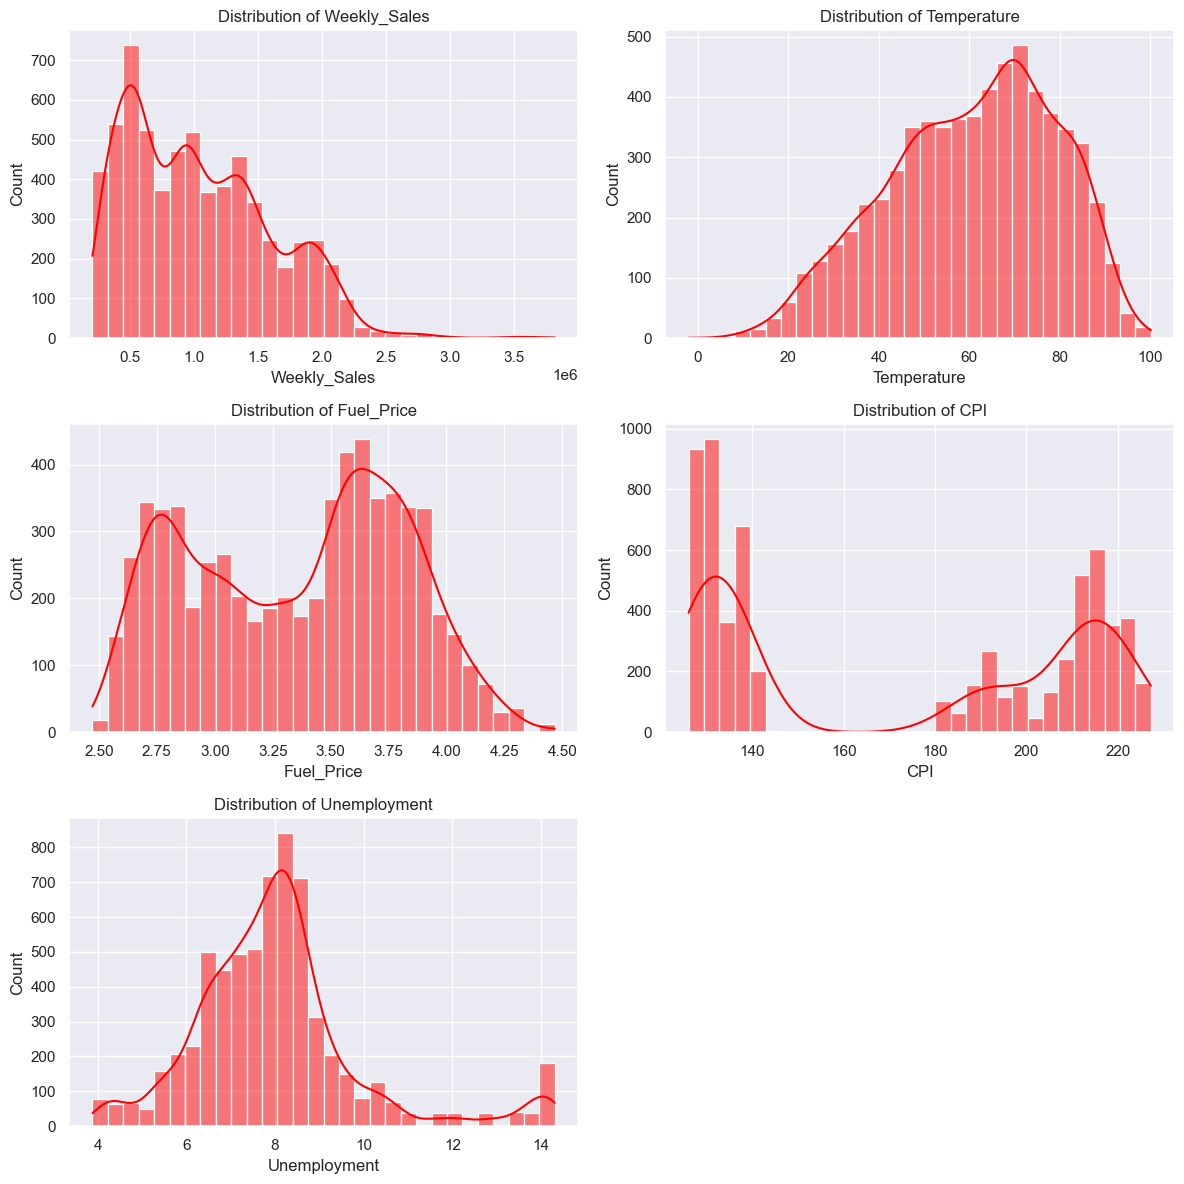

In [1099]:
# List of numeric features
num_features = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]

# Define the layout for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each feature
for i, feature in enumerate(num_features):
    sns.histplot(data=sales, x=feature, kde=True, bins=30, ax=axes[i] , color="red")
    axes[i].set_title(f"Distribution of {feature}")

# Hide any unused axes
for ax in axes[len(num_features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Notes
* "Weekly_Sales" is right skewed , I think this because the sales is high in some time
* "Temperature" & "Unemployment" have a normal Distribution
* "Fuel_Price" & "CPI" have bimodal distribution

Categorical Features

1. Holidays

In [1100]:
Holidays_counts = sales["Holidays"].value_counts()
Holidays_counts

Holidays
0    5985
1     450
Name: count, dtype: int64

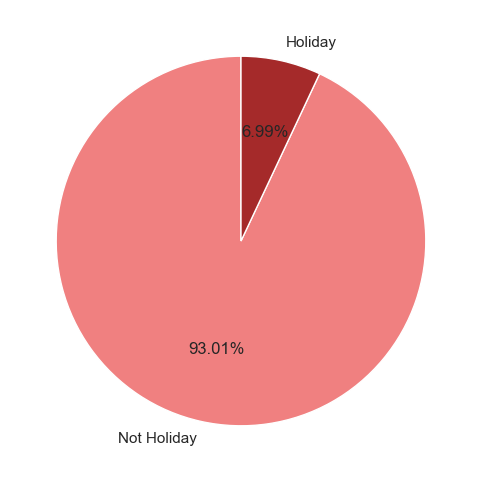

In [1101]:
# Plot The holidays col
plt.figure(figsize=(18, 6))
plt.pie(Holidays_counts, labels=["Not Holiday" , "Holiday" ], autopct='%1.2f%%', startangle=90 , colors=["lightcoral", "brown"])
plt.show()

* 7% of data have holidays

2. Years

In [1102]:
years_counts = sales["Year"].value_counts()
years_counts

Year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

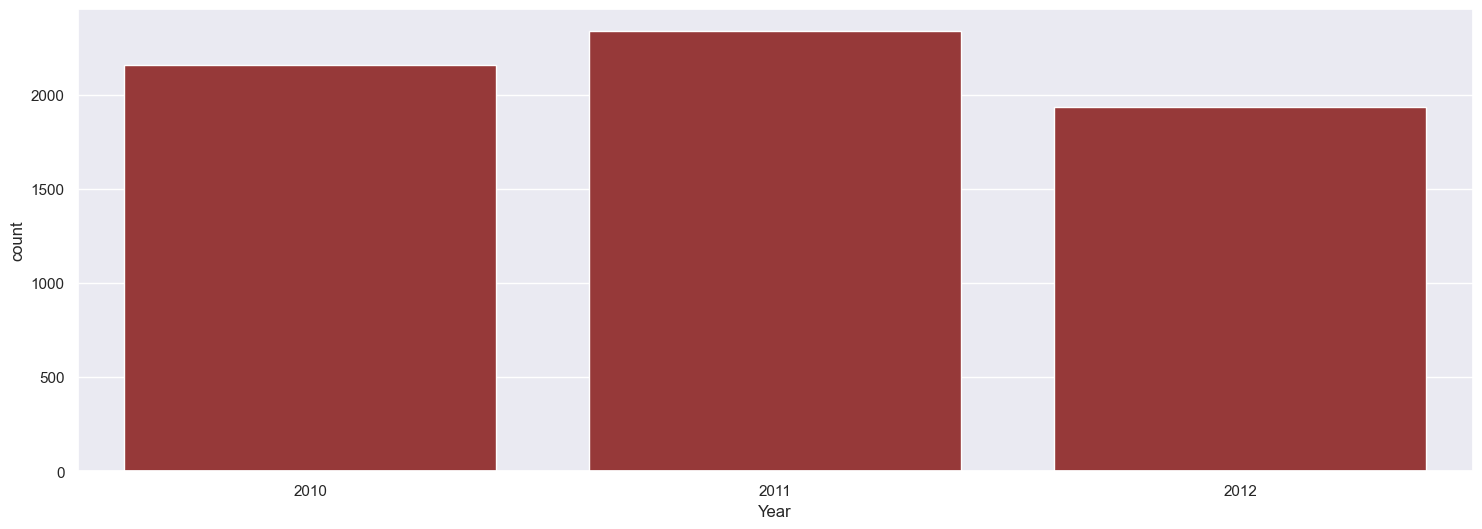

In [1103]:
# Plot the Year Col
plt.figure(figsize=(18,6))
sns.countplot(sales , x=sales["Year"] , color="brown")
plt.show()

* The Most sales in the dataset is recorded in 2011

3. Seasons

In [1104]:
seasons_counts = sales["Season"].value_counts()
seasons_counts

Season
Summer    1800
Spring    1755
Winter    1485
Fall      1395
Name: count, dtype: int64

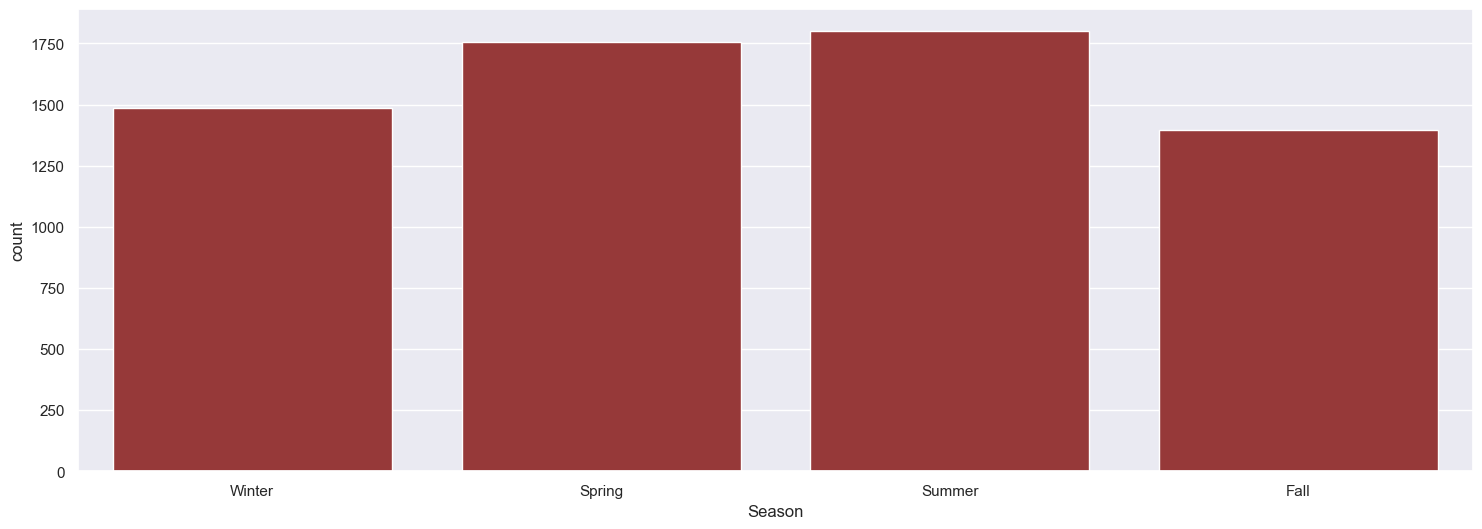

In [1105]:
# Plot the Year Col
plt.figure(figsize=(18,6))
sns.countplot(sales , x=sales["Season"] , color="brown")
plt.show()

* The Most sales in the dataset is recorded in Summer Season

4.Months

In [1106]:
Months_counts = sales["Month_Name"].value_counts()
Months_counts

Month_Name
April        630
July         630
June         585
March        585
October      585
September    585
August       585
February     540
May          540
December     450
November     360
January      360
Name: count, dtype: int64

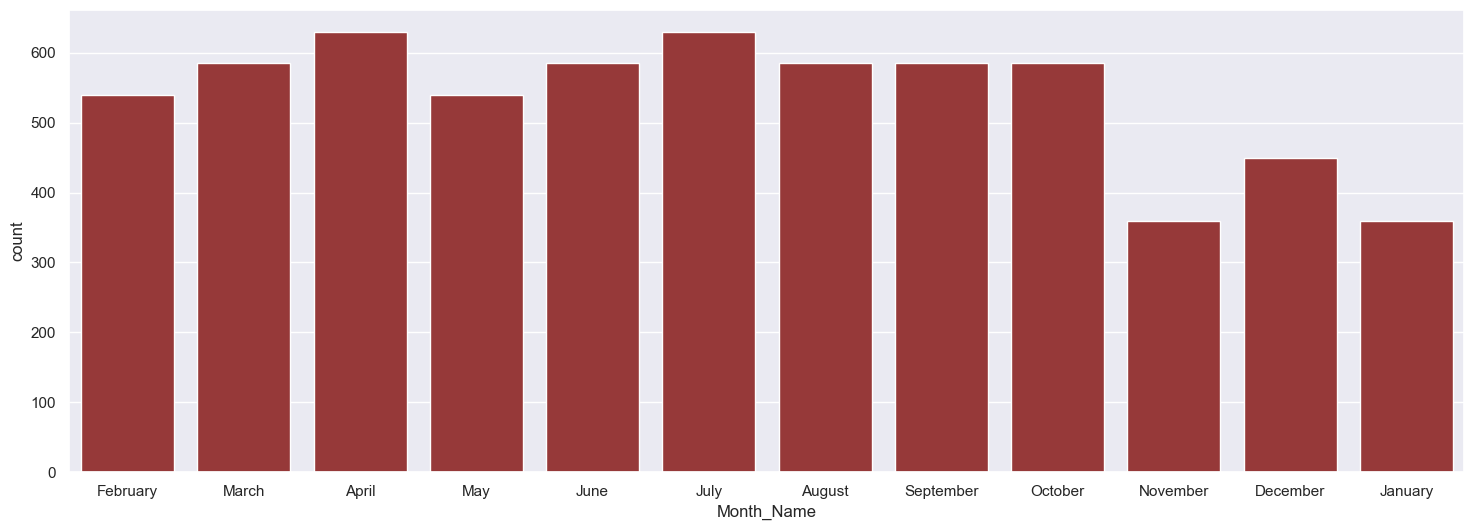

In [1107]:
# Plot the Year Col
plt.figure(figsize=(18,6))
sns.countplot(sales , x=sales["Month_Name"] , color="brown")
plt.show()

* The Most sales in the dataset is recorded in April & July Months

----------------------

2. Bi-varite Analysis

1. Week_Sales & Holidays

Q1 - We need to Know what is the Average Sales in normal days and Holidays 

In [1108]:
sales.groupby("Holidays")["Weekly_Sales"].mean().round(2)

Holidays
0    1041256.38
1    1122887.89
Name: Weekly_Sales, dtype: float64

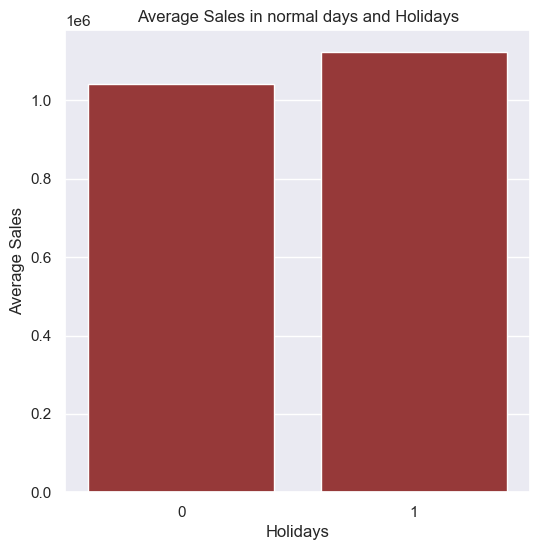

In [1109]:
plt.figure(figsize=(6,6))
sns.barplot(sales , x=sales["Holidays"] , y=sales["Weekly_Sales"] , estimator = np.mean , color="brown" , ci = False)
plt.title("Average Sales in normal days and Holidays")
plt.ylabel("Average Sales")
plt.show()

* The Average Sales in holidays is more than Normal Days

Q2  - We need to Know what is the sum of Sales in normal days and Holidays 

In [1110]:
sales.groupby("Holidays")["Weekly_Sales"].sum()

Holidays
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

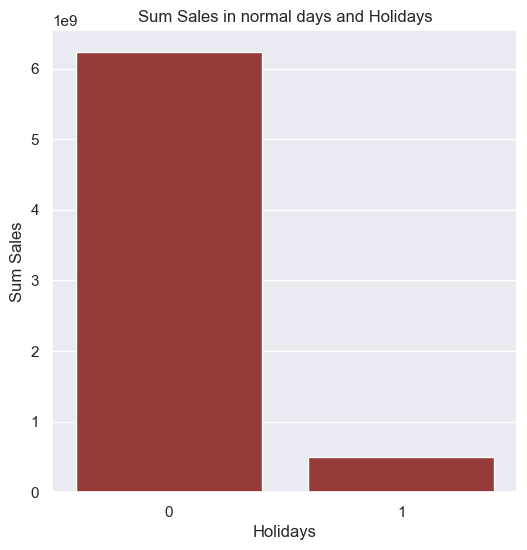

In [1111]:
plt.figure(figsize=(6,6))
sns.barplot(sales , x=sales["Holidays"] , y=sales["Weekly_Sales"] , estimator = np.sum , color="brown" , ci = False)
plt.title("Sum Sales in normal days and Holidays")
plt.ylabel("Sum Sales")
plt.show()

* The Sum Sales in holidays is less than Normal Days and this is normal because the count of holidays is less then Normal days

2. Weekly_Sales & Store

Q3 - What are Stores Have most Weekly Sales

In [1112]:
Stores = sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)
Stores

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

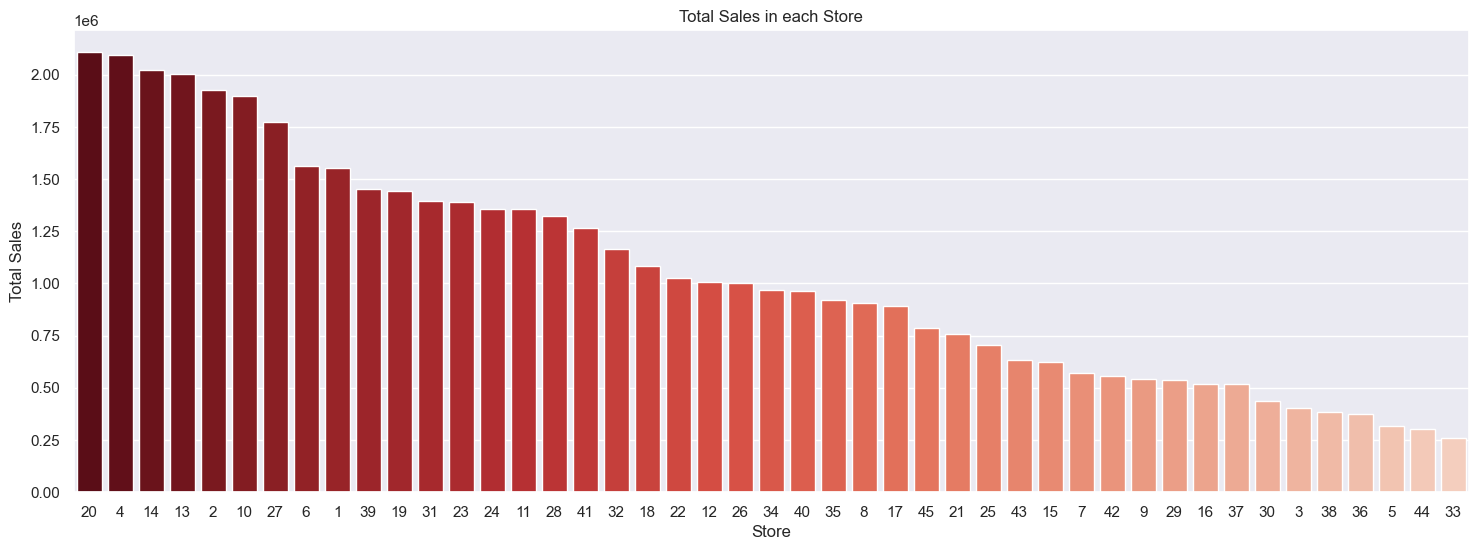

In [1113]:
colors = plt.cm.Reds(np.linspace(1,0.2 ,len(Stores)))  
plt.figure(figsize = (18, 6))
sns.barplot(sales, x = 'Store', y = 'Weekly_Sales', order = Stores.index, ci = False , palette=colors) 
plt.title('Total Sales in each Store')
plt.ylabel('Total Sales')
plt.show()

* Store No. 20 has the highest sales from any store with 301ml$ followed by Store No. 4 with 299ml$ and Store No. 33 comes last with 37ml$.

3. Weekly_sales & Temperature

Q4 - How the Temperature is Effect on Weekly Sales

In [1114]:
sales.groupby("Temperature")["Weekly_Sales"].mean().sort_values(ascending = False)

Temperature
25.17    3766687.43
35.92    3676388.98
43.21    3526713.39
24.07    2819193.17
48.08    2789469.45
            ...    
95.28     224806.96
61.95     224639.76
91.45     224294.39
94.00     224031.19
52.91     219804.85
Name: Weekly_Sales, Length: 3528, dtype: float64

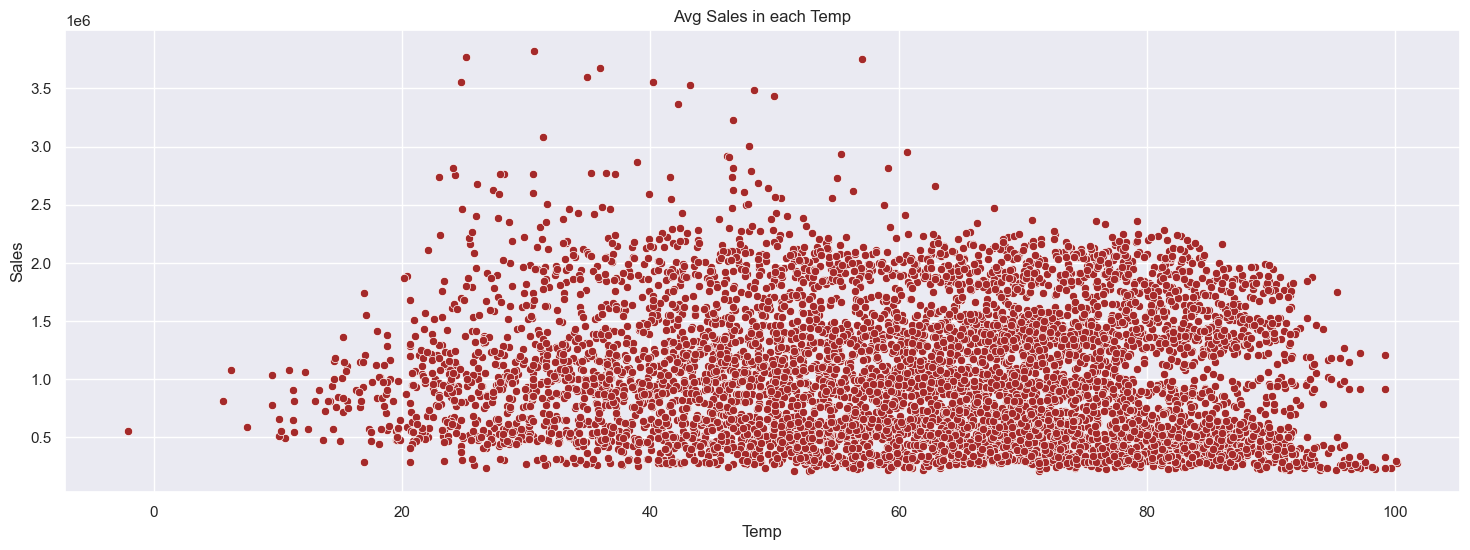

In [1115]:
plt.figure(figsize = (18, 6))
sns.scatterplot(sales, x = 'Temperature', y = 'Weekly_Sales', color="brown") 
plt.title('Avg Sales in each Temp')
plt.xlabel('Temp')
plt.ylabel('Sales')
plt.show()

* The Tempertures don't affect On Sales 

4. Weekly_Sales & Fuel_Price

Q5 - What Happen for Sales by changing Fuel Price ?

In [1116]:
sales.groupby("Fuel_Price")["Weekly_Sales"].mean().sort_values(ascending = False)

Fuel_Price
2.887    2573730.820
3.141    2468572.728
3.309    2377675.605
3.225    2175149.075
3.587    2142553.830
            ...     
3.313     301444.940
3.576     300236.850
3.490     298947.510
3.164     293350.510
3.392     279643.430
Name: Weekly_Sales, Length: 892, dtype: float64

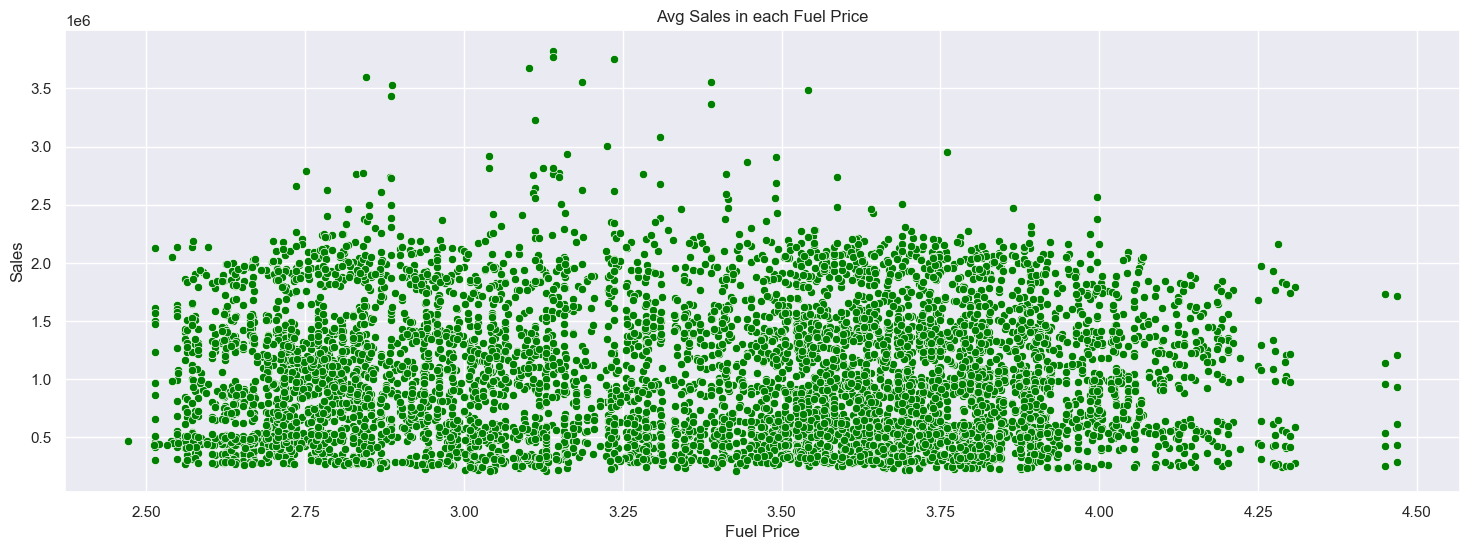

In [1117]:
plt.figure(figsize = (18, 6))
sns.scatterplot(sales, x = 'Fuel_Price', y = 'Weekly_Sales', color="green") 
plt.title('Avg Sales in each Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Sales')
plt.show()

* The Changing of Fual Price don't affect On Sales 

5. weekly_sales & cpi

Q6 - What happen to sales based on changing of CPI ?

In [1118]:
sales.groupby("CPI")["Weekly_Sales"].mean().sort_values(ascending = False)

CPI
182.544590    2750774.24
212.916508    2727575.18
220.947724    2644633.02
204.637673    2531039.31
188.929975    2445513.49
                 ...    
211.791557     274742.63
211.571892     273282.97
211.877147     270281.63
211.927001     268929.03
212.008514     260636.71
Name: Weekly_Sales, Length: 2145, dtype: float64

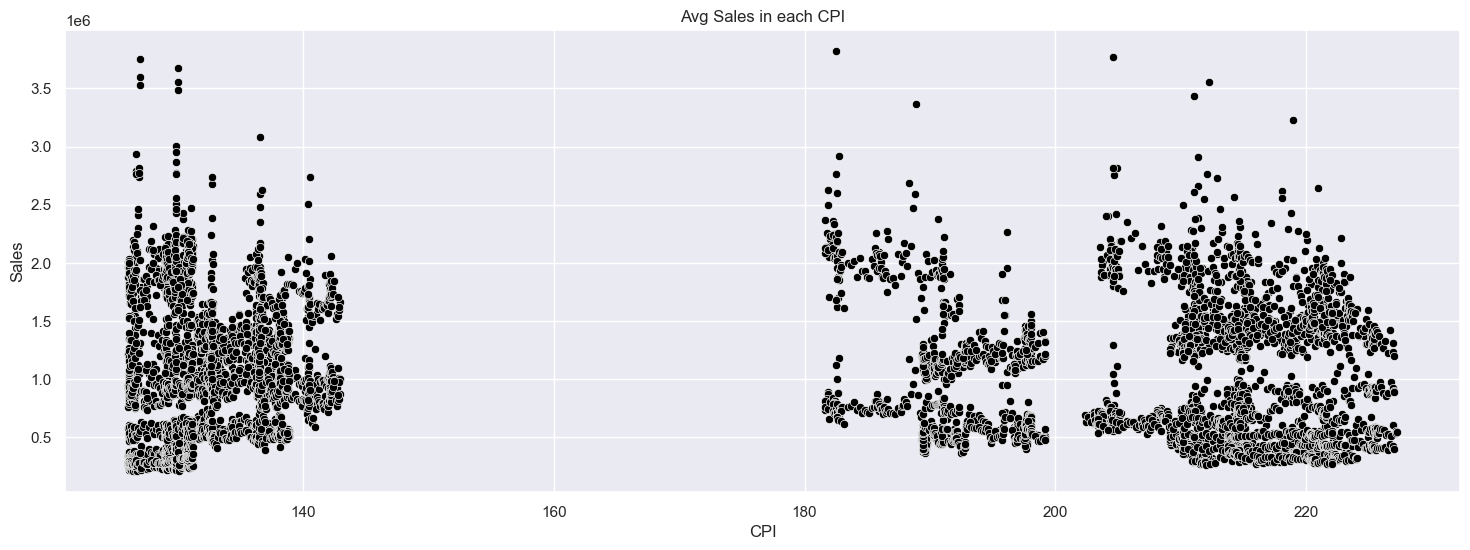

In [1119]:
plt.figure(figsize = (18, 6))
sns.scatterplot(sales, x = 'CPI', y = 'Weekly_Sales', color="Black") 
plt.title('Avg Sales in each CPI')
plt.xlabel('CPI')
plt.ylabel('Sales')
plt.show()

* No change of weekly sales by CPI but There are two catogeries 
(120-145) CPI is class  and  (180-230) CPI is another class

6. weekly_sales & Unemployment 

Q7 What happen to Sales by increase Unemployment Rate or decrease Unemployment Rate ?

In [1120]:
sales.groupby("Unemployment")["Weekly_Sales"].mean().sort_values(ascending = False)

Unemployment
5.143    2.421418e+06
6.392    2.288295e+06
7.127    2.206391e+06
4.308    2.188797e+06
7.795    2.160586e+06
             ...     
8.687    2.516350e+05
8.010    2.489681e+05
8.951    2.489027e+05
8.442    2.473689e+05
9.265    2.389144e+05
Name: Weekly_Sales, Length: 349, dtype: float64

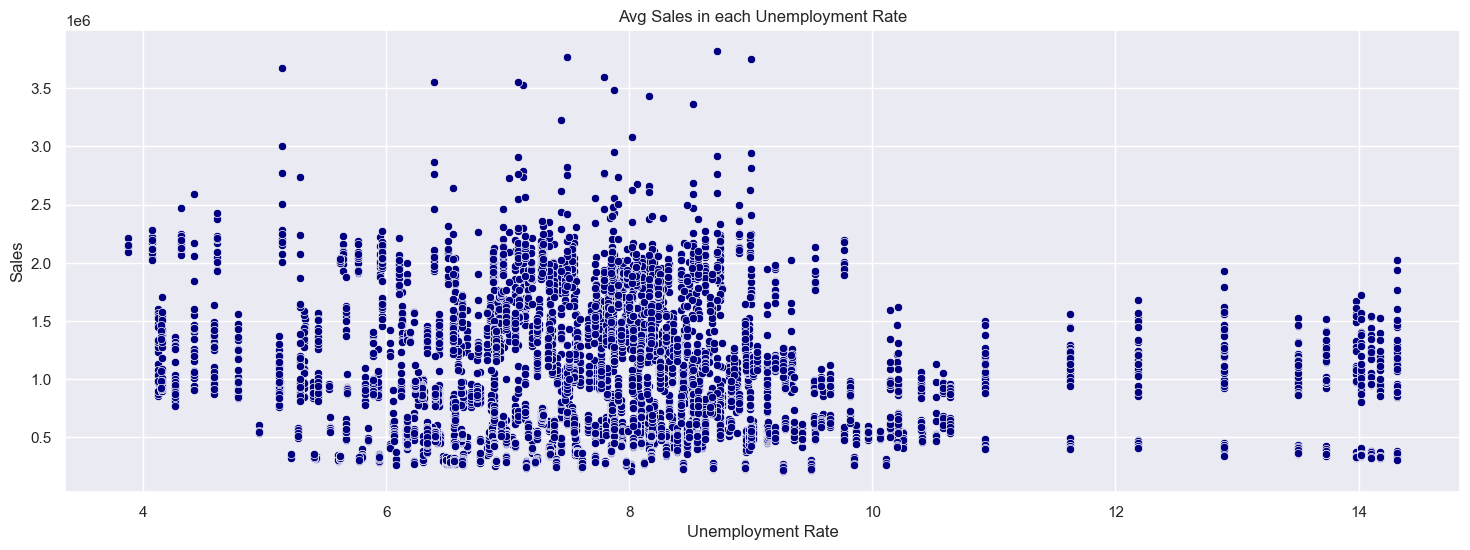

In [1121]:
plt.figure(figsize = (18, 6))
sns.scatterplot(sales, x = 'Unemployment', y = 'Weekly_Sales', color="Navy") 
plt.title('Avg Sales in each Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Sales')
plt.show()

* The Changing of Unemployment Rate don't affect On Sales 

------

3. Time-Series Analysis

7. Weekly_Sales & Week

Q8 What is the change of sales during the weeks? 

In [1122]:
sales.groupby("Week")["Weekly_Sales"].sum().sort_values(ascending = False)

Week
51    1.579297e+08
22    1.472422e+08
7     1.471902e+08
27    1.470118e+08
14    1.467551e+08
6     1.456823e+08
23    1.451475e+08
31    1.437064e+08
24    1.434817e+08
26    1.430931e+08
18    1.424894e+08
5     1.419895e+08
33    1.413328e+08
21    1.409434e+08
34    1.407740e+08
36    1.407277e+08
9     1.407131e+08
25    1.401614e+08
32    1.401174e+08
40    1.398813e+08
35    1.397305e+08
13    1.391557e+08
16    1.384837e+08
10    1.380332e+08
28    1.378596e+08
19    1.377021e+08
15    1.367863e+08
11    1.367628e+08
29    1.362228e+08
20    1.359906e+08
43    1.350028e+08
42    1.340080e+08
8     1.338659e+08
41    1.336528e+08
47    1.324146e+08
30    1.324108e+08
12    1.320040e+08
37    1.311007e+08
17    1.309520e+08
38    1.284312e+08
39    1.281706e+08
50    1.219065e+08
49    1.112279e+08
48    9.929958e+07
45    9.459903e+07
44    9.443753e+07
46    9.156456e+07
1     8.773121e+07
52    8.647498e+07
3     8.273564e+07
2     8.269676e+07
4     7.943483e+07
Name: W

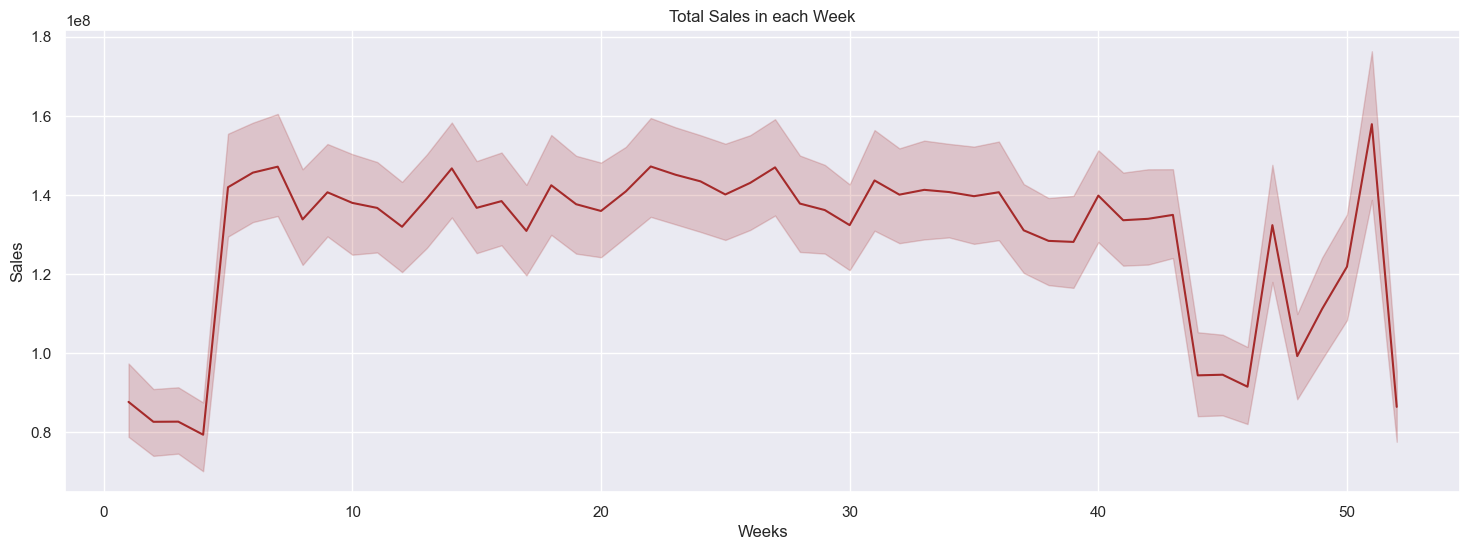

In [1123]:
plt.figure(figsize = (18, 6))
sns.lineplot(sales, x = 'Week', y = 'Weekly_Sales', color="brown" , estimator = np.sum) 
plt.title('Total Sales in each Week')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show()

* Highest Week Have total Sales is Week 51

8. Weekly_Sales & (Month - Month_Name)

Q9 What is the change of sales during the Months? 

In [1124]:
Months = sales.groupby("Month_Name")["Weekly_Sales"].sum().sort_values(ascending = False)
Months

Month_Name
July         6.500010e+08
April        6.468598e+08
June         6.226299e+08
August       6.130902e+08
March        5.927859e+08
October      5.847848e+08
September    5.787612e+08
December     5.768386e+08
February     5.687279e+08
May          5.571256e+08
November     4.130157e+08
January      3.325984e+08
Name: Weekly_Sales, dtype: float64

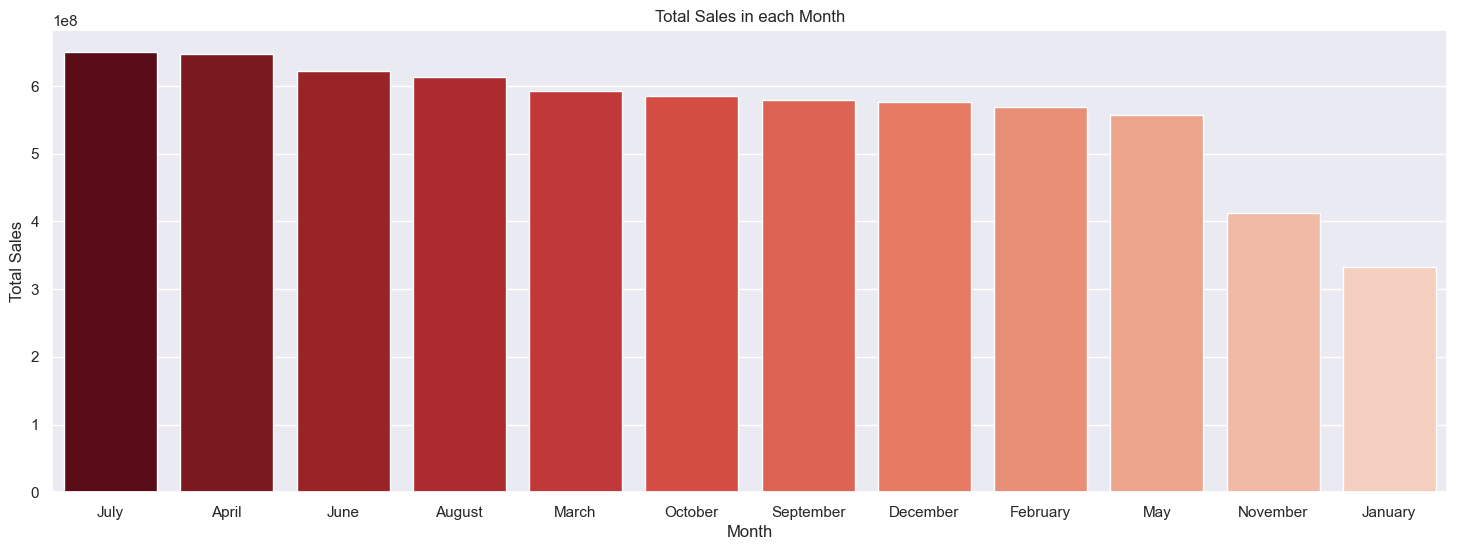

In [1125]:
colors = plt.cm.Reds(np.linspace(1,0.2 ,len(Months)))  
plt.figure(figsize = (18, 6))
sns.barplot(sales, x = 'Month_Name', y = 'Weekly_Sales', order = Months.index, estimator=np.sum ,ci = False , palette=colors) 
plt.title('Total Sales in each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

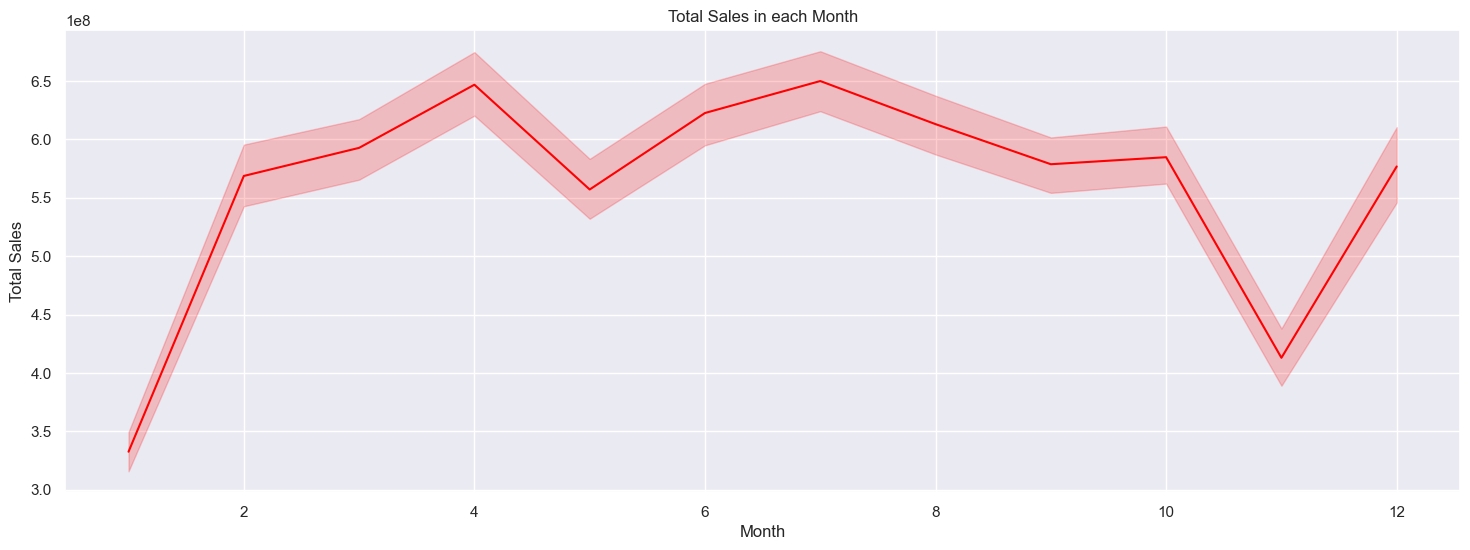

In [1126]:
plt.figure(figsize = (18, 6))
sns.lineplot(sales, x = 'Month', y = 'Weekly_Sales', estimator=np.sum, color="red" ) 
plt.title('Total Sales in each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

* Most Sales was in July & April Months 
* Lowest Sales was in January & November Months

9. Weekly_Sales & Season

Q10 What is the change of sales during the Seasons? 

In [1127]:
sales.groupby("Season")["Weekly_Sales"].sum().sort_values(ascending = False)

Season
Summer    1.841852e+09
Spring    1.826615e+09
Fall      1.574639e+09
Winter    1.494112e+09
Name: Weekly_Sales, dtype: float64

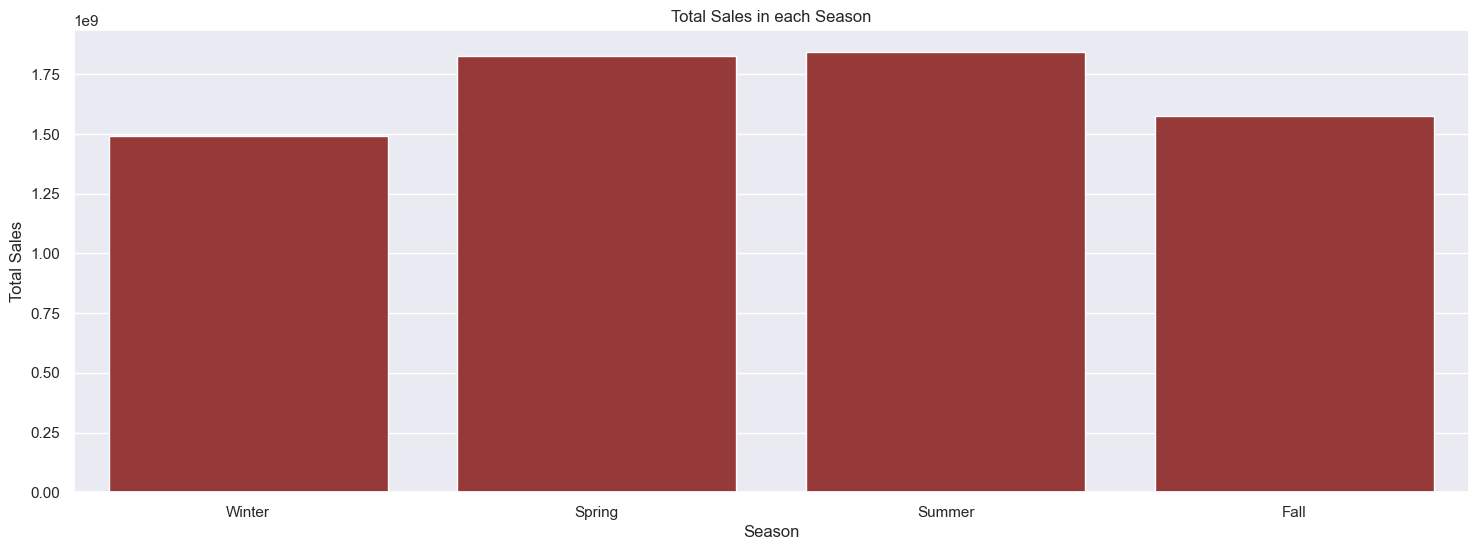

In [1128]:
plt.figure(figsize = (18, 6))
sns.barplot(sales, x = 'Season', y = 'Weekly_Sales', estimator=np.sum ,ci = False ,color="brown") 
plt.title('Total Sales in each Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

* Most Sales was in Summer & Spring Months 

10. Weekly_Sales & Year

Q11 What is the change of sales during the Years? 

In [1129]:
sales.groupby("Year")["Weekly_Sales"].sum().sort_values(ascending = False)

Year
2011    2.448200e+09
2010    2.288886e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

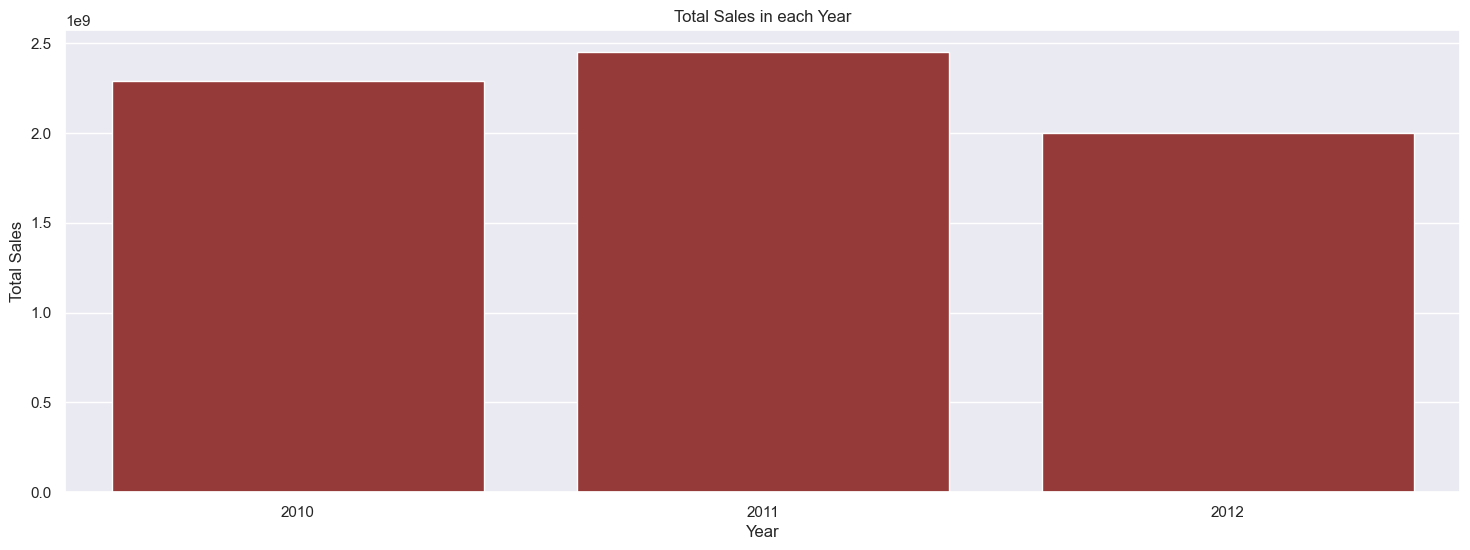

In [1130]:
plt.figure(figsize = (18, 6))
sns.barplot(sales, x = 'Year', y = 'Weekly_Sales', estimator=np.sum ,ci = False ,color="brown") 
plt.title('Total Sales in each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

* Most Sales was in 2011 Year and this is make sense because 2011 has the most entries in our dataset

Q12 What are the Total Sales in each year Regarding the month ?

In [1131]:
pd.pivot_table(data=sales, values="Weekly_Sales", columns="Month_Name", index="Year", aggfunc="sum")

Month_Name,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2010,2.314124e+08,1.876401e+08,2.887605e+08,1.903330e+08,NaN,2.325801e+08,1.922462e+08,1.819198e+08,1.867109e+08,2.028534e+08,2.171618e+08,1.772679e+08
2011,2.265265e+08,1.885993e+08,2.880781e+08,1.863313e+08,1.637040e+08,2.299114e+08,1.897734e+08,1.793564e+08,1.816482e+08,2.101624e+08,1.832613e+08,2.208477e+08
2012,1.889209e+08,2.368508e+08,NaN,1.920636e+08,1.688945e+08,1.875095e+08,2.406103e+08,2.315097e+08,1.887665e+08,NaN,1.843617e+08,1.806455e+08


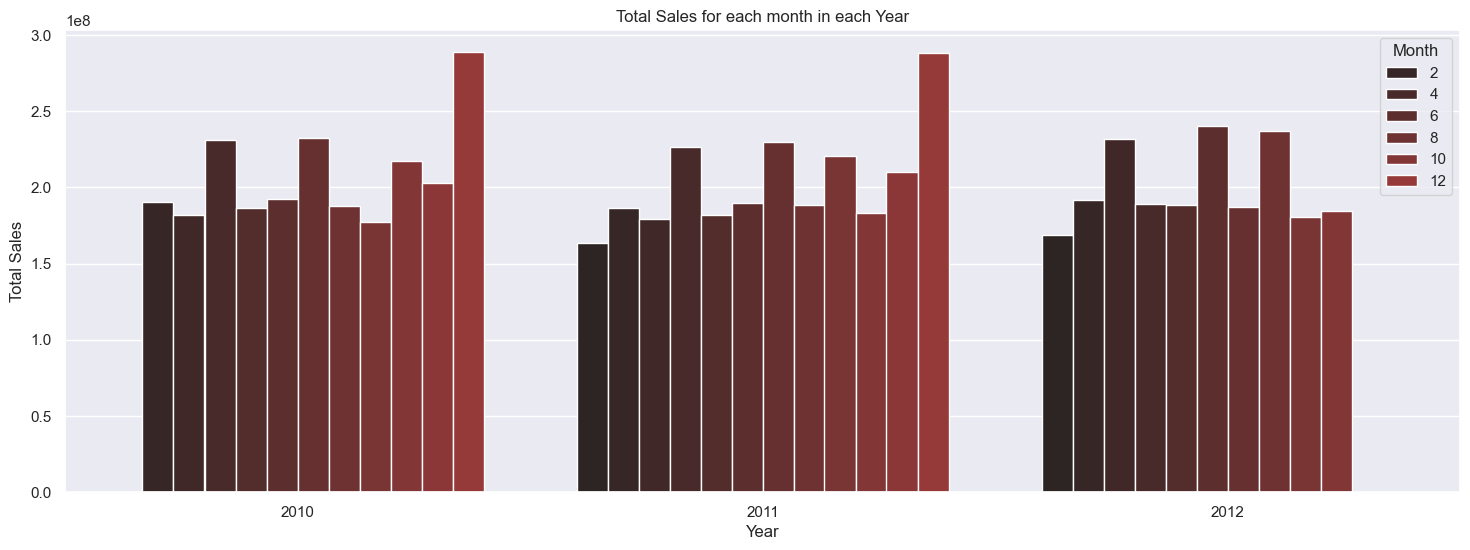

In [1132]:
plt.figure(figsize = (18, 6))
sns.barplot(sales, x = 'Year', y = 'Weekly_Sales', hue="Month" , estimator=np.sum ,ci = False ,color="brown") 
plt.title('Total Sales for each month in each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

Total Sales was highest in 2010 & 2011 
* in 2010 , Total Sales was high in December with 288ml$ 
* in 2011 , Total Sales was high in December with 288ml$ 
* in 2012 , Total Sales was high in June with 240ml$ 

Q13 What are the Total Sales in each year Regarding the Season ?

In [1133]:
pd.pivot_table(data=sales, values="Weekly_Sales", columns="Season", index="Year", aggfunc="sum")

Season,Fall,Spring,Summer,Winter
Year,,,,
2010,7.087757e+08,6.103695e+08,5.974881e+08,3.722528e+08
2011,6.815017e+08,5.979481e+08,6.393585e+08,5.293917e+08
2012,1.843617e+08,6.182977e+08,6.050058e+08,5.924677e+08


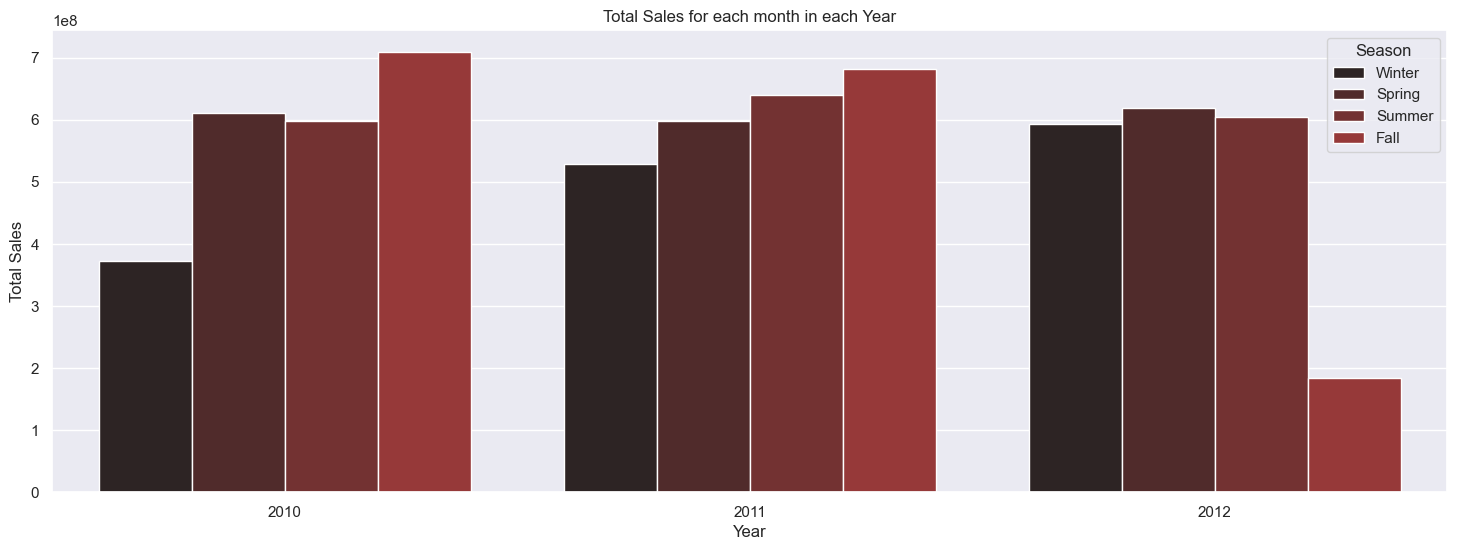

In [1134]:
plt.figure(figsize = (18, 6))
sns.barplot(sales, x = 'Year', y = 'Weekly_Sales', hue="Season" , estimator=np.sum ,ci = False ,color="brown") 
plt.title('Total Sales for each month in each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

Total Sales was highest in 2010 & 2011 
* in 2010 , Total Sales was high in Fall with 708ml$ 
* in 2011 , Total Sales was high in Fall with 681ml$ 
* in 2012 , Total Sales was high in Spring with 618ml$ 

Q14 What is the trend of Total Sales Over time ?

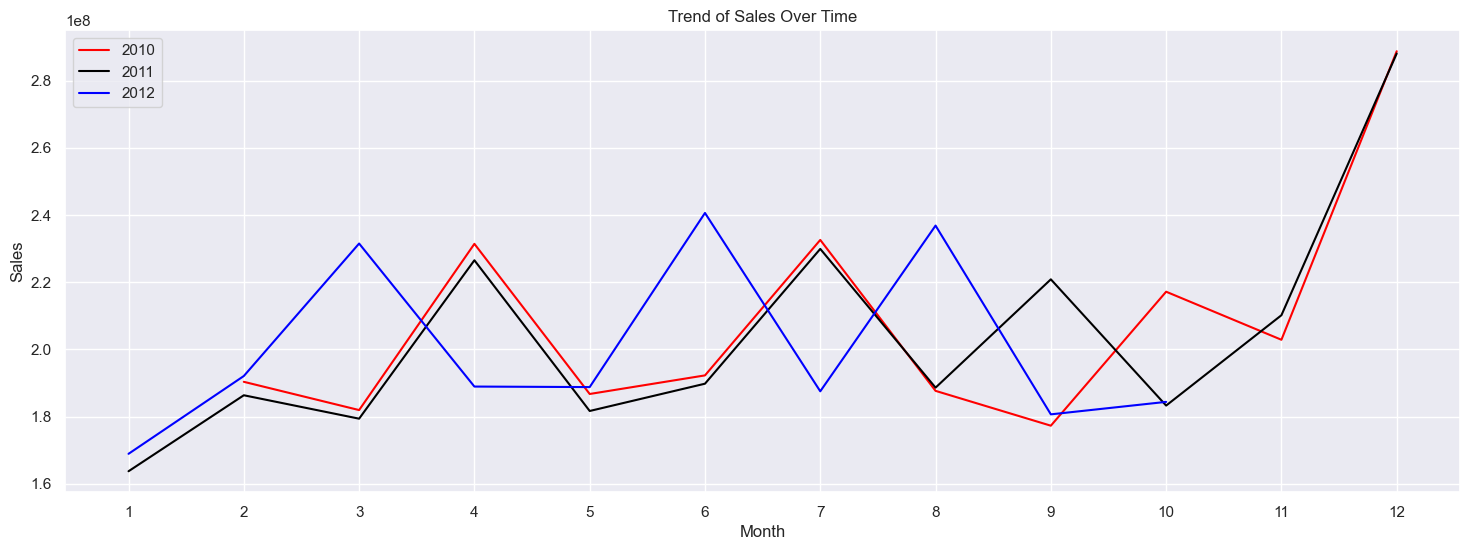

In [1135]:
sales_2010 = sales[sales['Year'] == 2010].groupby('Month')['Weekly_Sales'].sum()
sales_2011 = sales[sales['Year'] == 2011].groupby('Month')['Weekly_Sales'].sum()
sales_2012 = sales[sales['Year'] == 2012].groupby('Month')['Weekly_Sales'].sum()

# Plot
plt.figure(figsize=(18, 6))

# Line plots for each year
sns.lineplot(x=sales_2010.index, y=sales_2010.values, label='2010' , color ="red")
sns.lineplot(x=sales_2011.index, y=sales_2011.values, label='2011' , color ="black")
sns.lineplot(x=sales_2012.index, y=sales_2012.values, label='2012' , color ="blue")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Trend of Sales Over Time")
plt.xticks(range(1, 13))
plt.show()

* Sales are similar in most months, but the Trend of Sales showed at the end of 2010 and 2011 

# Data Correlation

In [1136]:
sales.select_dtypes(include="number").corr().abs()

,Store,Weekly_Sales,Holidays,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Quarter,Year
Store,1.000000e+00,0.335332,4.386841e-16,0.022659,0.060023,0.209492,0.223531,3.106283e-15,2.910676e-15,5.034745e-16,3.474318e-12
Weekly_Sales,3.353320e-01,1.000000,3.689097e-02,0.063810,0.009464,0.072634,0.106176,7.421127e-02,7.614332e-02,6.336275e-02,1.837754e-02
Holidays,4.386841e-16,0.036891,1.000000e+00,0.155091,0.078347,0.002162,0.010960,1.277427e-01,1.229958e-01,8.136344e-02,5.678257e-02
Temperature,2.265908e-02,0.063810,1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.361833e-01,2.358618e-01,2.444967e-01,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,7.834652e-02,0.144982,1.000000,0.170642,0.034684,3.240300e-02,4.215590e-02,4.307778e-02,7.794703e-01
CPI,2.094919e-01,0.072634,2.162091e-03,0.176888,0.170642,1.000000,0.302020,6.041530e-03,4.979672e-03,4.733426e-03,7.479573e-02
Unemployment,2.235313e-01,0.106176,1.096028e-02,0.101158,0.034684,0.302020,1.000000,1.589158e-02,1.274559e-02,1.787284e-02,2.418135e-01
Week,3.106283e-15,0.074211,1.277427e-01,0.236183,0.032403,0.006042,0.015892,1.000000e+00,9.959843e-01,9.638699e-01,1.819189e-01
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,0.042156,0.004980,0.012746,9.959843e-01,1.000000e+00,9.670705e-01,1.944645e-01
Quarter,5.034745e-16,0.063363,8.136344e-02,0.244497,0.043078,0.004733,0.017873,9.638699e-01,9.670705e-01,1.000000e+00,1.852383e-01


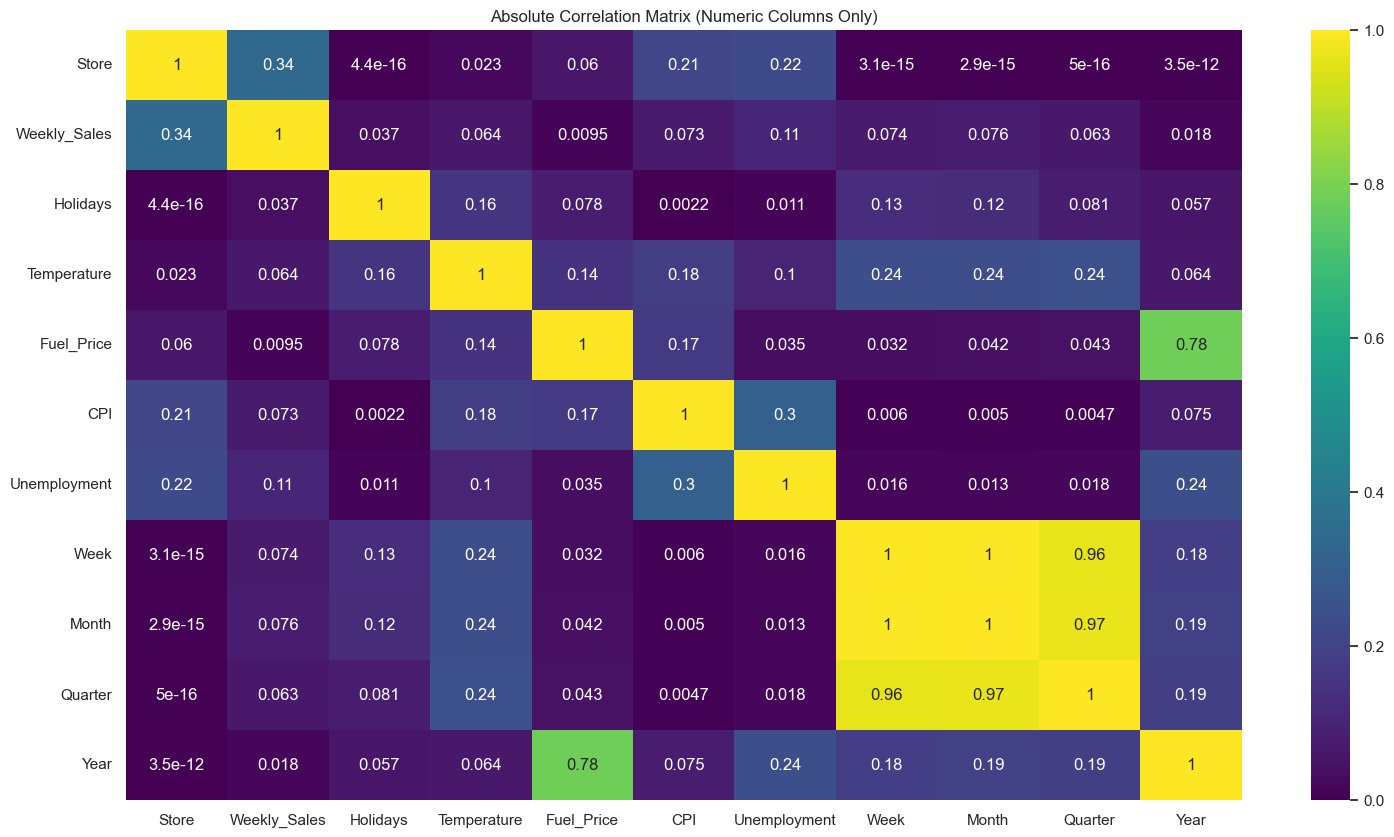

In [1137]:
plt.figure(figsize=(18, 10))
# Create heatmap
sns.heatmap(
    sales.select_dtypes(include="number").corr().abs(),
    annot=True,
    cmap='viridis',
    vmin=0,
    vmax=1)
plt.title("Absolute Correlation Matrix (Numeric Columns Only)")
plt.show()

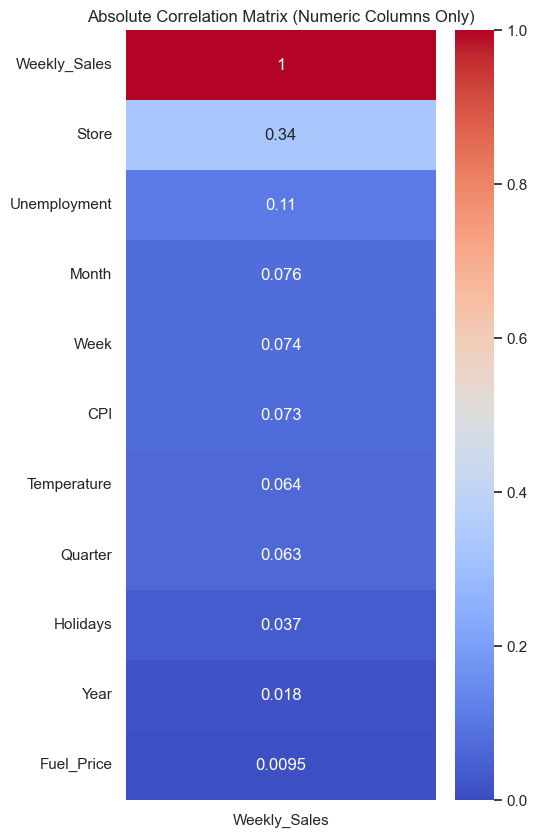

In [1138]:
Weekly_Sales_corr = sales.select_dtypes(include="number").corr()["Weekly_Sales"].abs().sort_values(ascending=False).to_frame()

plt.figure(figsize=(5, 10))
# Create heatmap
sns.heatmap(Weekly_Sales_corr,
            annot=True,
            cmap="coolwarm",
            vmin=0,
            vmax=1)
plt.title("Absolute Correlation Matrix (Numeric Columns Only)")
plt.show()

* The Sales have strong correlation with some Features like (Stores , Unemployment) 
* And Some Features also can predict The Weekly Sales like (Months , CPI , Temperature)

# Data Preprocessing

1. Droping Unnecessery Columns

* We Don't Need Quarter Because We have Seasons 
* We Don't Need Month Because We have Month_Name
* We Don't Year & Date again Because The months and Seasons are Enough for Predicition
* And We will drop Fuel_Price Because the Low correlition and this maybe make Underfitting 

In [1139]:
# Drop columns
sales.drop(["Date" , "Year" , "Month" , "Quarter" , "Fuel_Price"] , axis=1 , inplace=True)
sales.sample(5)

,Store,Weekly_Sales,Holidays,Temperature,CPI,Unemployment,Week,Month_Name,Season
1456,11,1369634.92,0,86.54,214.834195,7.346,31,August,Summer
2248,16,453979.19,0,28.17,196.826279,6.162,4,January,Winter
5278,37,521959.28,0,85.56,220.631936,6.623,31,August,Summer
6167,44,296818.20,0,65.24,126.111903,7.972,23,June,Spring
561,4,2283540.30,0,81.41,130.790968,4.077,33,August,Summer


2. Change DataTypes

* We Need to change The datatype of some features because This columns not could be numric features

In [1140]:
sales.dtypes

Store             int64
Weekly_Sales    float64
Holidays          int64
Temperature     float64
CPI             float64
Unemployment    float64
Week              int32
Month_Name       object
Season           object
dtype: object

In [1141]:
# Change The Data Types
sales["Store"] = sales["Store"].astype(object)
sales["Holidays"] = sales["Holidays"].astype(object)
sales["Week"] = sales["Week"].astype(object)

In [1142]:
sales.dtypes

Store            object
Weekly_Sales    float64
Holidays         object
Temperature     float64
CPI             float64
Unemployment    float64
Week             object
Month_Name       object
Season           object
dtype: object

3. Removing Outliers

* First We Need to detect them

In [1143]:
sales.select_dtypes(include=['number']).quantile([0.01 , 0.1 , 0.15 ,0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

,Weekly_Sales,Temperature,CPI,Unemployment
0.01,2.531031e+05,18.5236,126.106903,4.156
0.10,3.841255e+05,34.5600,128.512193,6.061
0.15,4.522316e+05,39.7900,129.693800,6.403
0.25,5.533501e+05,47.4600,131.735000,6.891
0.50,9.607460e+05,62.6700,182.616521,7.874
0.75,1.420159e+06,74.9400,212.743293,8.622
0.90,1.887626e+06,83.9920,219.534098,9.863
0.95,2.049179e+06,87.6630,221.926729,12.187
0.99,2.404035e+06,93.1900,225.470151,14.180
1.00,3.818686e+06,100.1400,227.232807,14.313


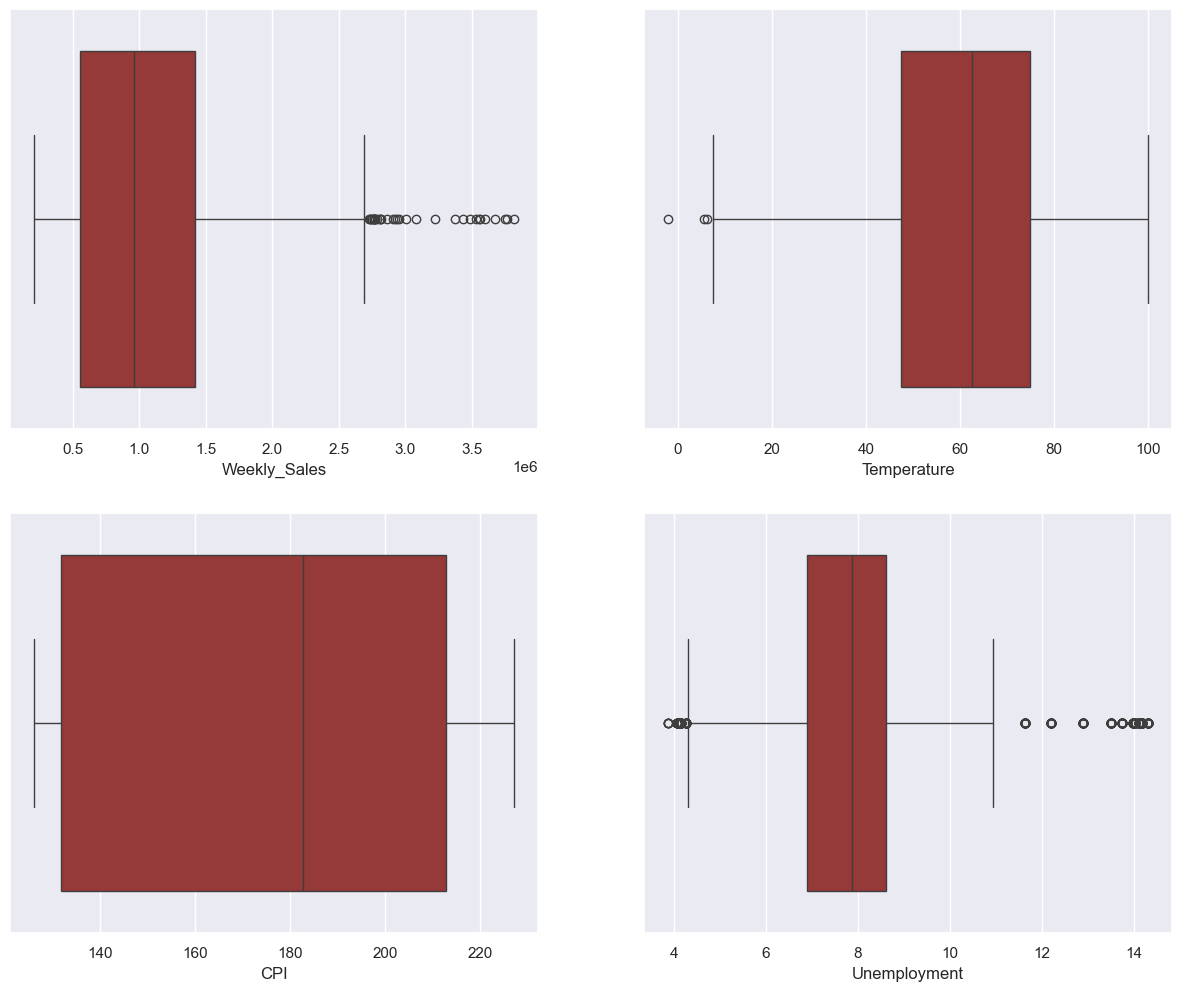

In [1144]:
# Identify numeric columns
numeric_cols = sales.select_dtypes(include="number").columns

plt.figure(figsize=(15,12))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(sales, x = col, color = 'brown')
plt.show()

* We need to fix Unemployment & Temperature 
* and the Weekly_Sales is the Predecition column that we can't get close to

In [1145]:
sales.shape

(6435, 9)

In [1146]:
# Remove outliers from the unemployment & Temperature columns
sales = sales[(sales['Unemployment'] > 4.4) & (sales['Unemployment'] < 11) & (sales['Temperature'] > 7)]

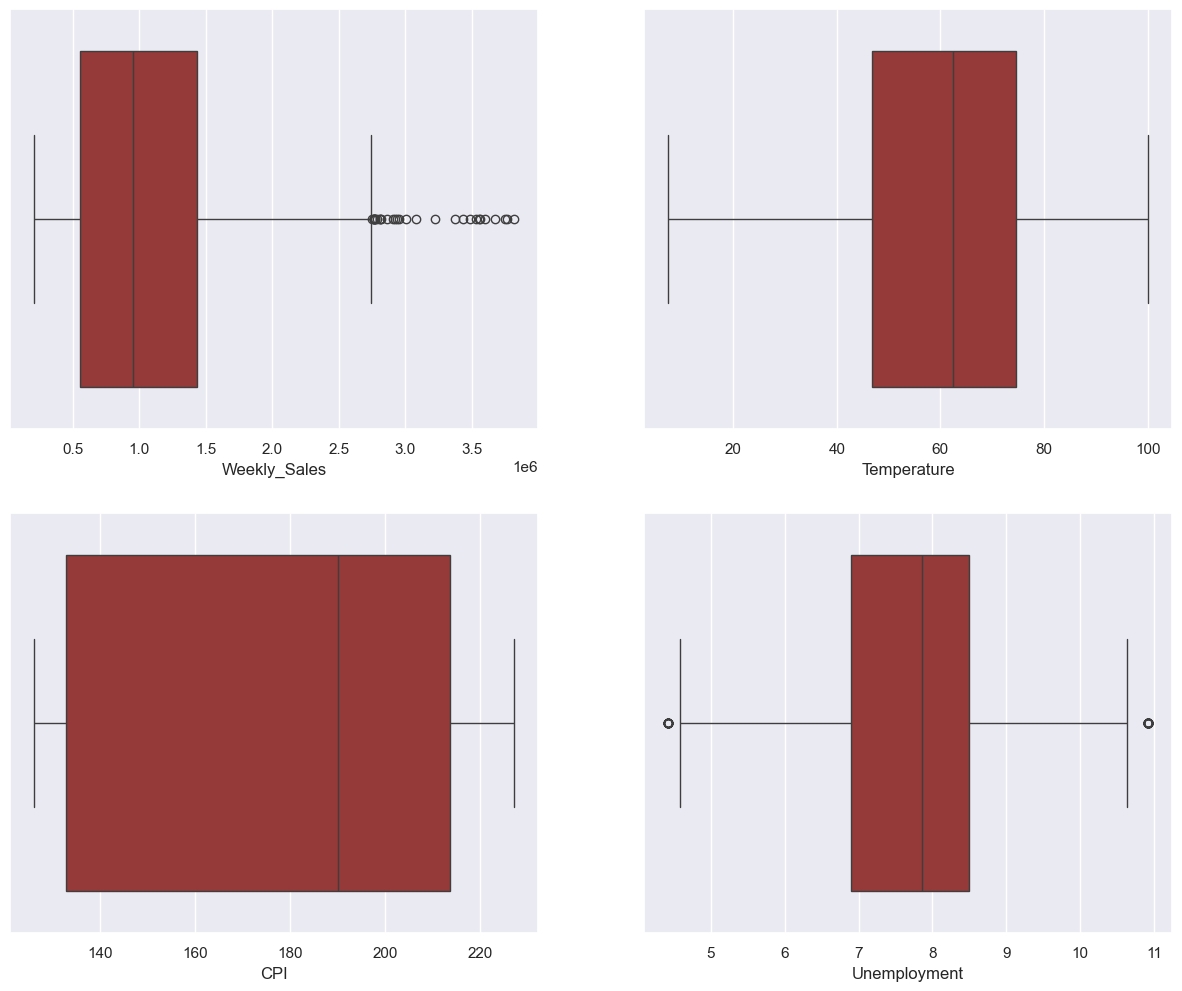

In [1147]:
# Identify numeric columns
numeric_cols = sales.select_dtypes(include="number").columns

plt.figure(figsize=(15,12))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(sales, x = col, color = 'brown')
plt.show()

In [1148]:
sales.shape

(5938, 9)

4. Data spliting

In [1149]:
# Declare x & y
x = sales.drop("Weekly_Sales" , axis=1)
y = sales["Weekly_Sales"]

In [1236]:
x.to_csv('streamlit_data.csv', index=False)

In [1150]:
from sklearn.model_selection import train_test_split

# Split The Data
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)
x_train.shape , x_test.shape ,y_train.shape , y_test.shape

((4750, 8), (1188, 8), (4750,), (1188,))

5. Date Transformation

In [1151]:
# Numerical Features
num_cols = x.select_dtypes(include='number').columns.tolist()

# Categorical Features
cat_cols = x.select_dtypes(exclude='number').columns.tolist()

print(num_cols , cat_cols)

['Temperature', 'CPI', 'Unemployment'] ['Store', 'Holidays', 'Week', 'Month_Name', 'Season']


In [1152]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder

num_pipeline = make_pipeline(SimpleImputer(),
                             StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             BinaryEncoder())

preprocessor = make_column_transformer((num_pipeline, num_cols),
                                       (cat_pipeline, cat_cols))

xtrain = preprocessor.fit_transform(x_train)
xtest = preprocessor.transform(x_test)

# Modeling

1. Linear Regression

In [1153]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Linear Regression
lin_reg.fit(xtrain, y_train)

print("Intercept =", lin_reg.intercept_)
print("Coef =", lin_reg.coef_)

Intercept = 714167.7877821979
Coef = [  35011.56214759  -76151.33519613  -56603.89795795  295473.67508882
  183997.6849291   322668.28307594  125928.170649    144892.79913072
  -61366.31658702   22919.54435578  -22919.54435578  -40344.767693
  -19955.23047093  -10279.09854892  -13221.36248504   64358.36792702
    2346.84132056  -70117.99036656   86716.56571862  -26738.19148252
 -225043.10260231   30287.51877772  -86743.02793643  224458.16612137]


In [1154]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
pred_y_train = lin_reg.predict(xtrain)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_train, pred_y_train)))
print('Train Accuracy:', round(r2_score(y_train, pred_y_train), 2))

RMSE: 522062.92910896265
Train Accuracy: 0.16


Tuning The Model

In [1161]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly = PolynomialFeatures()
xtrain_poly = poly.fit_transform(xtrain)

# Fitting the linear regression model to the polynomial features
lin_reg.fit(xtrain_poly, y_train)

# Calculating and printing the R^2 score for training
print('Train Accuracy by poly:', lin_reg.score(xtrain_poly, y_train))

Train Accuracy by poly: 0.7672236250091323


In [1160]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline with polynomial features and linear regression
pipeline = Pipeline([('poly', PolynomialFeatures()),
                     ('lin_reg', LinearRegression())])

# Define the parameter grid to search
param_grid = {'poly__degree': [1, 2, 3, 4] }

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy", round(best_score, 3))

Best Parameters: {'poly__degree': 3}
Best Accuracy 0.963


In [1164]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
xtrain_poly = poly.fit_transform(xtrain)

# Fitting the linear regression model to the polynomial features
lin_reg.fit(xtrain_poly, y_train)

# Calculating and printing the R^2 score for training
print('Train Accuracy by poly:', lin_reg.score(xtrain_poly, y_train))

Train Accuracy by poly: 0.9835069575021926


Testing Accuracy

In [1205]:
xtest_poly = poly.transform(xtest)
print('Test Accuracy by poly:', lin_reg.score(xtest_poly, y_test))

Test Accuracy by poly: 0.969822877782605


* Let's try more models, maybe we will have better accuracy

----

2. Support Vector Regressor

In [1192]:
from sklearn.svm import SVR

svr = SVR(kernel="poly")

# Fit the model on training data
svr.fit(xtrain, y_train)

# Print the accuracy score on the training data
print("Accuracy:", svr.score(xtrain, y_train))

Accuracy: -0.02872529819535563


Tuning The Model

In [1195]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [1, 10, 100, 1000] , "epsilon" : [0.1 , 0.01 , 0.001 , 0.0001]}

# Create the GridSearchCV object
grid_search = GridSearchCV(svr, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", round(best_score, 3))

Best Parameters: {'C': 1000, 'epsilon': 0.1}
Best Accuracy: 0.07


poly kernel

In [1202]:
svr_poly = SVR(**best_params , kernel="poly" , degree=3)

# Fit the model on training data
svr_poly.fit(xtrain, y_train)

# Print the accuracy score on the training data
print("Accuracy:", svr_poly.score(xtrain, y_train))

Accuracy: 0.09488195666220767


rbf kernal

In [1203]:
svr_rbf = SVR(**best_params , kernel="rbf" , degree=3)

# Fit the model on training data
svr_rbf.fit(xtrain, y_train)

# Print the accuracy score on the training data
print("Accuracy:", svr_rbf.score(xtrain, y_train))

Accuracy: 0.0053659102245777746


Testing Accuracy

In [1204]:
print('Test Accuracy by poly:', svr_poly.score(xtest, y_test))

Test Accuracy by poly: 0.08580500048384809


* SVR Model was bad choice lets try other models

-------

3. KNN Regressor

In [1217]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()

# Fit The Model
knn.fit(xtrain , y_train)

# Print the accuracy score on the training data
print("Accuracy :" , knn.score(xtrain , y_train))

Accuracy : 0.6438645889684675


Tuning The Model

In [1210]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_neighbors': np.arange(1,21)}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", round(best_score, 3))

Best Parameters: {'n_neighbors': np.int64(1)}
Best Accuracy: 0.561


In [1219]:
knn = KNeighborsRegressor(**best_params)

# Fit the model on training data
knn.fit(xtrain, y_train)

# Print the accuracy score on the training data
print("Accuracy:", knn.score(xtrain, y_train))

Accuracy: 1.0


Testing Accuracy

In [1220]:
print("Accuracy on Testing:", knn.score(xtest, y_test))

Accuracy on Testing: 0.7078994618826134


I think Enaugh

These are our models
* Linear Regression: 96.84 % 
* SVR Regressor : 8.68 %
* KNN Regressor: 70.78 %

Best Model We got is Linear Regression

# Save The Model

In [1226]:
import joblib

# Save the preprocessor and model
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(lin_reg, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

# Streamlit App

In [1237]:
%%writefile WalmartStore_app.py

import streamlit as st
import joblib
import pandas as pd

# Load the data file
data = pd.read_csv("streamlit_data.csv")

# Load the preprocessor and model
preprocessor = joblib.load('preprocessor.pkl')
lin_reg = joblib.load('linear_regression_model.pkl')

# Streamlit app layout
st.title('Weekly Sales Prediction')

# User input using sliders
store = st.selectbox('Store', data['Store'].unique())
holidays = st.selectbox('Holidays', data['Holidays'].unique())
month_name = st.selectbox('Month Name', data['Month_Name'].unique())
season = st.selectbox('Season', data['Season'].unique())
temperature = st.slider('Temperature', min_value=data['Temperature'].min(), max_value=data['Temperature'].max())
cpi = st.slider('CPI', min_value=data['CPI'].min(), max_value=data['CPI'].max())
unemployment = st.slider('Unemployment', min_value=data['Unemployment'].min(), max_value=data['Unemployment'].max())

# Create a DataFrame from user input
input_data = pd.DataFrame({
    'Store': [store],
    'Holidays': [holidays],
    'Temperature': [temperature],
    'CPI': [cpi],
    'Unemployment': [unemployment],
    'Week': [week],
    'Month_Name': [month_name],
    'Season': [season]
})

# Predict button
if st.button('Predict Weekly Sales'):
    # Preprocess the input data
    transformed_data = preprocessor.transform(input_data)

    # Make predictions
    prediction = lin_reg.predict(transformed_data)
    
    # Display the prediction
    st.success(f'Predicted Weekly Sales: {prediction[0]:.2f}')

Overwriting WalmartStore_app.py


In [1238]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
